In [ ]:
from google.colab import files
uploaded = files.upload()

Saving merged_threat_data (1).csv to merged_threat_data (1).csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving csic_2010_combined.csv to csic_2010_combined.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving lstm_model.h5 to lstm_model.h5


**IMPORTING LIBRARIES**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

**Load the merged dataset**


In [ ]:
df = pd.read_csv("merged_threat_data (1).csv")

<ipython-input-7-286442978ff7>:1: DtypeWarning: Columns (3,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("merged_threat_data (1).csv")


In [ ]:
print(df.head())


           TimeCreated        Id                      ProviderName LogName  \
0  2014-11-22 03:27:34  1.000000   Microsoft-Windows-DHCPv6-Client  System   
1  2014-11-22 03:27:34  0.980214     Microsoft-Windows-Dhcp-Client  System   
2  2014-11-22 03:27:35  0.002116    Microsoft-Windows-Kernel-Power  System   
3  2014-11-22 03:27:36  0.000235  Microsoft-Windows-Kernel-General  System   
4  2015-07-10 22:22:57  0.002116    Microsoft-Windows-Kernel-Power  System   

    Label  Label_encoded LevelDisplayName Message Message_cleaned  
0  Botnet              1              NaN     NaN             NaN  
1  Botnet              1              NaN     NaN             NaN  
2  Botnet              1              NaN     NaN             NaN  
3  Botnet              1              NaN     NaN             NaN  
4  Botnet              1              NaN     NaN             NaN  


**Encode categorical columns**

In [ ]:
le = LabelEncoder()
df['ProviderName'] = le.fit_transform(df['ProviderName'])
df['LevelDisplayName'] = le.fit_transform(df['LevelDisplayName'])

**Class distribution**

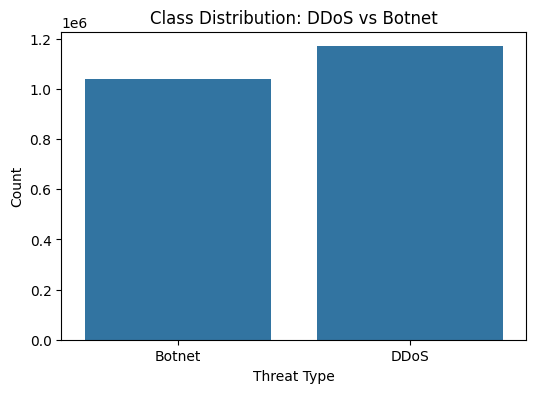

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Label', data=df)
plt.title("Class Distribution: DDoS vs Botnet")
plt.xlabel("Threat Type")
plt.ylabel("Count")
plt.show()


** Feature correlation heatmap**

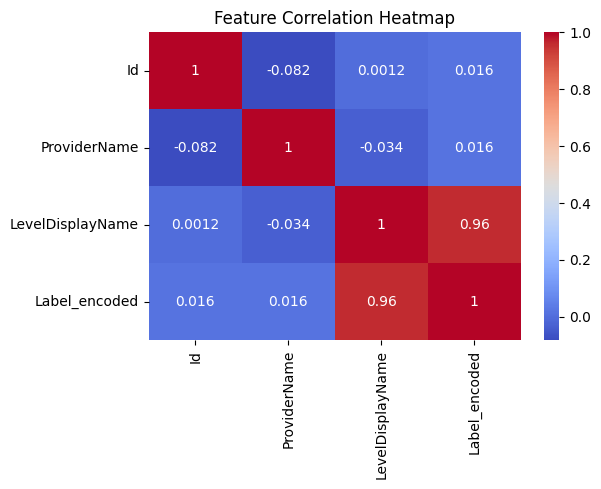

In [ ]:
corr = df[['Id', 'ProviderName', 'LevelDisplayName', 'Label_encoded']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


**Prepare features and labels**

In [ ]:
X = df[['Id', 'ProviderName', 'LevelDisplayName']]
y = df['Label_encoded']

**Train-test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Train Random Forest**

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**Predict**

In [ ]:
y_pred = rf.predict(X_test)

**Classification report**

In [ ]:
print("📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["DDoS", "Botnet"]))

📊 Classification Report:
              precision    recall  f1-score   support

        DDoS       1.00      1.00      1.00    351087
      Botnet       1.00      1.00      1.00    312474

    accuracy                           1.00    663561
   macro avg       1.00      1.00      1.00    663561
weighted avg       1.00      1.00      1.00    663561



**Confusion matrix**

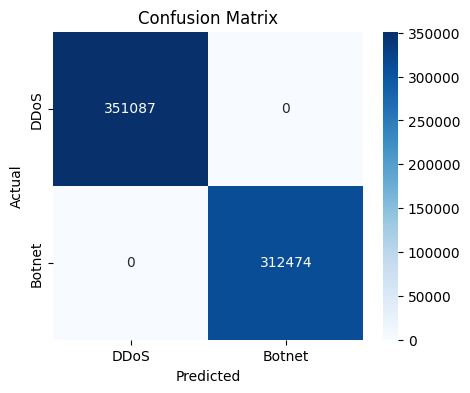

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["DDoS", "Botnet"], yticklabels=["DDoS", "Botnet"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Feature importance**

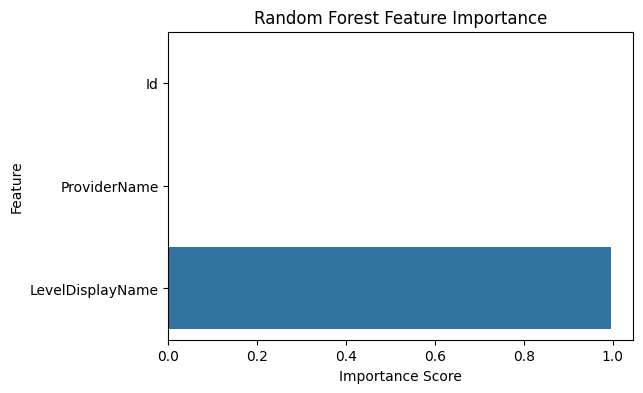

In [ ]:
importances = rf.feature_importances_
features = ['Id', 'ProviderName', 'LevelDisplayName']
plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=features)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [ ]:
# View a few sample cleaned messages
df['Message_cleaned'].dropna().sample(10).tolist()


['the amazon ssm agent service entered the stopped state',
 'the themes service entered the running state',
 'the amazon ssm agent service terminated unexpectedly  it has done this 221 times  the following corrective action will be taken in 30000 milliseconds restart the service',
 'the microsoft account signin assistant service entered the stopped state',
 'the amazon ssm agent service terminated unexpectedly  it has done this 224 times  the following corrective action will be taken in 30000 milliseconds restart the service',
 'the amazon ssm agent service terminated unexpectedly  it has done this 345 times  the following corrective action will be taken in 30000 milliseconds restart the service',
 'the amazon ssm agent service terminated with the following servicespecific error \r\nincorrect function',
 'the ec2config service entered the running state',
 'the amazon ssm agent service terminated with the following servicespecific error \r\nincorrect function',
 'the amazon ssm agent se

**CNN-LSTM Model for Text Classification**

In [ ]:

#  Text Preprocessing

import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Drop nulls and extract text + labels
df = df.dropna(subset=['Message_cleaned'])
texts = df['Message_cleaned'].astype(str).tolist()
labels = df['Label_encoded'].tolist()

# Tokenization
MAX_NUM_WORDS = 10000
MAX_SEQUENCE_LENGTH = 100

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
y = np.array(labels)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



**CNN-LSTM Model**

In [ ]:

#CNN-LSTM Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout

embedding_dim = 128

model = Sequential()
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=embedding_dim))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Build model to view summary
model.build(input_shape=(None, X_train.shape[1]))
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 96, 64)              │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 48, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,354,113 (5.17 MB)

 Trainable params: 1,354,113 (5.17 MB)

 Non-trainable params: 0 (0.00 B)

**Model training**

In [ ]:

# Train the Model

history = model.fit(X_train, y_train,
                    epochs=3,
                    batch_size=128,
                    validation_split=0.2)


Epoch 1/3
5121/5121 ━━━━━━━━━━━━━━━━━━━━ 956s 186ms/step - accuracy: 0.9985 - loss: 0.0053 - val_accuracy: 1.0000 - val_loss: 1.4745e-07
Epoch 2/3
5121/5121 ━━━━━━━━━━━━━━━━━━━━ 981s 186ms/step - accuracy: 1.0000 - loss: 7.8463e-07 - val_accuracy: 1.0000 - val_loss: 4.8873e-09
Epoch 3/3
5121/5121 ━━━━━━━━━━━━━━━━━━━━ 959s 182ms/step - accuracy: 1.0000 - loss: 7.1305e-08 - val_accuracy: 1.0000 - val_loss: 1.5354e-10


**Training Accuracy and Loss Over Epochs**

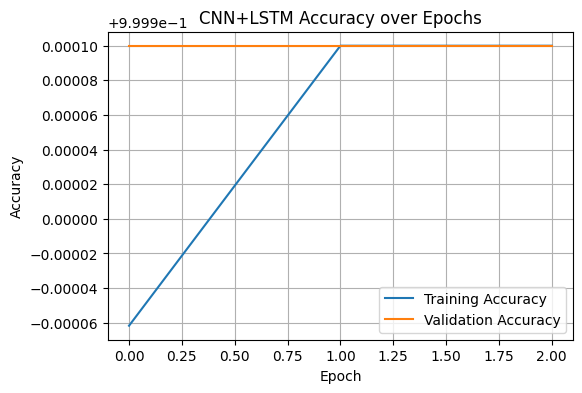

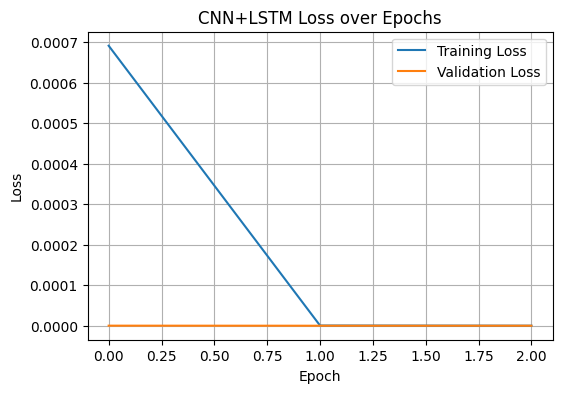

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN+LSTM Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN+LSTM Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


**Confusion Matrix**

10972/10972 ━━━━━━━━━━━━━━━━━━━━ 172s 16ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


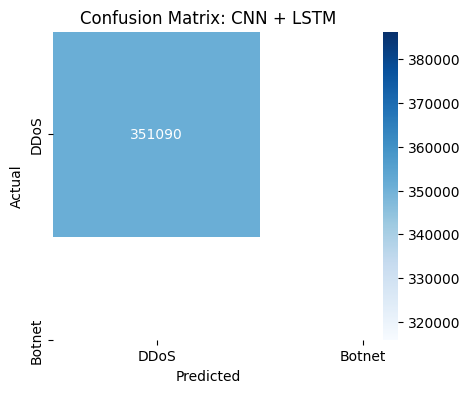

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Predict on test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["DDoS", "Botnet"], yticklabels=["DDoS", "Botnet"])
plt.title("Confusion Matrix: CNN + LSTM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Saving the Model**

In [ ]:
model.save('lstm_model.h5')


**Downloading the LTSM model**

In [ ]:
from google.colab import files
files.download('lstm_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Creating a benchmark dataset**

In [ ]:
# Sample 600 entries evenly from both classes (300 DDoS, 300 Botnet)
benchmark_df = df.groupby('Label_encoded').apply(lambda x: x.sample(n=300, random_state=42)).reset_index(drop=True)


<ipython-input-27-9c1bbc6d269e>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  benchmark_df = df.groupby('Label_encoded').apply(lambda x: x.sample(n=300, random_state=42)).reset_index(drop=True)


In [ ]:
benchmark_df.to_csv('benchmark_threat_dataset.csv', index=False)


**PRINTING THE BENCHMARK DATASET**

In [ ]:
print(benchmark_df.head())


           TimeCreated        Id  ProviderName LogName Label  Label_encoded  \
0  2018-02-12 03:45:09  0.137582            35     NaN  DDoS              0   
1  2018-02-13 00:06:44  0.137719            35     NaN  DDoS              0   
2  2018-02-12 18:52:37  0.137719            35     NaN  DDoS              0   
3  2018-02-12 23:31:43  0.137817            35     NaN  DDoS              0   
4  2018-02-11 15:25:53  0.137817            35     NaN  DDoS              0   

   LevelDisplayName                                            Message  \
0                 1  The Amazon SSM Agent service terminated with t...   
1                 1  The Amazon SSM Agent service terminated unexpe...   
2                 1  The Amazon SSM Agent service terminated unexpe...   
3                 2  The CDPUserSvc_251cd service entered the runni...   
4                 2  The Amazon SSM Agent service entered the stopp...   

                                     Message_cleaned  
0  the amazon ssm agent s

In [ ]:
from google.colab import files
files.download('benchmark_threat_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**New dataset**

In [ ]:
import pandas as pd

df = pd.read_csv("csic_2010_combined.csv")
df.head()


,message,label
0,\n,0
1,"Accept: text/xml,application/xml,application/x...",0
2,"Accept-Encoding: x-gzip, x-deflate, gzip, defl...",1
3,\n,0
4,POST http://localhost:8080/tienda1/miembros/ed...,1


**Tokenize and Pad**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Extract messages and labels
texts = df['message'].astype(str).tolist()
labels = df['label'].tolist()

# Tokenize
MAX_NUM_WORDS = 10000
MAX_SEQUENCE_LENGTH = 100

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
y = np.array(labels)


**LOADING THE LSTM**

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('lstm_model.h5')


**Predict**

In [ ]:
y_pred_prob = model.predict(X)
y_pred = (y_pred_prob > 0.5).astype("int32")


26493/26493 ━━━━━━━━━━━━━━━━━━━━ 419s 16ms/step


**Evaluate**

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.58      1.00      0.73    492000
           1       0.00      0.00      0.00    355776

    accuracy                           0.58    847776
   macro avg       0.29      0.50      0.37    847776
weighted avg       0.34      0.58      0.43    847776



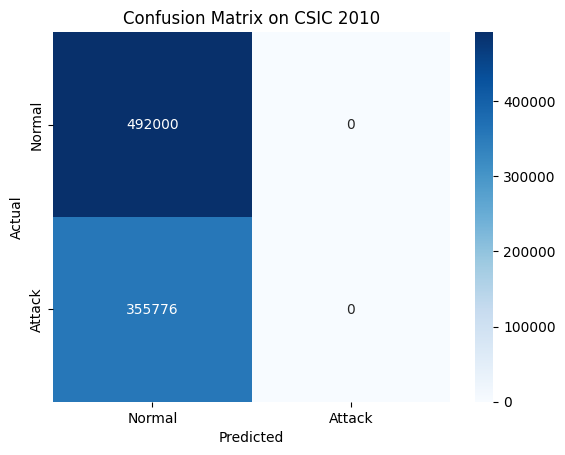

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y, y_pred))

# Confusion matrix
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on CSIC 2010')
plt.show()


In [ ]:
print(df.columns)



Index(['message', 'label'], dtype='object')


In [ ]:
import pandas as pd
print(df['label'].value_counts())  # Assuming your label column is named 'Label'


label
0    492000
1    355776
Name: count, dtype: int64


**TOKENIZE AND PAD**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Parameters (use same as during training)
MAX_NUM_WORDS = 10000
MAX_SEQUENCE_LENGTH = 100

# Tokenize and pad
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(df['message'])  # Fit on CSIC messages
sequences = tokenizer.texts_to_sequences(df['message'])
X_test = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

# Extract true labels
y_test = df['label'].values


**LOAD THE LSTM**

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('lstm_model.h5')


**PREDICT**

In [ ]:
# Predict probabilities and convert to 0 or 1
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype('int').flatten()


26493/26493 ━━━━━━━━━━━━━━━━━━━━ 433s 16ms/step


**EVALUATE**

Confusion Matrix:
[[492000      0]
 [355776      0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.58      1.00      0.73    492000
           1       0.00      0.00      0.00    355776

    accuracy                           0.58    847776
   macro avg       0.29      0.50      0.37    847776
weighted avg       0.34      0.58      0.43    847776


Accuracy: 0.5803


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


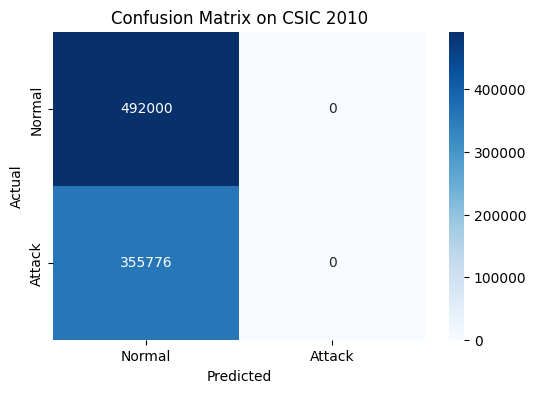

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc:.4f}")

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on CSIC 2010')
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving benchmark_threat_dataset.csv to benchmark_threat_dataset (1).csv


**Rename the benchmark dataset and print**

In [ ]:
import pandas as pd

# Load the benchmark dataset
cicids_df = pd.read_csv('benchmark_threat_dataset.csv')

# Preview the data
print(cicids_df.head())
print(cicids_df.columns)


           TimeCreated        Id  ProviderName  LogName Label  Label_encoded  \
0  2018-02-12 03:45:09  0.137582            35      NaN  DDoS              0   
1  2018-02-13 00:06:44  0.137719            35      NaN  DDoS              0   
2  2018-02-12 18:52:37  0.137719            35      NaN  DDoS              0   
3  2018-02-12 23:31:43  0.137817            35      NaN  DDoS              0   
4  2018-02-11 15:25:53  0.137817            35      NaN  DDoS              0   

   LevelDisplayName                                            Message  \
0                 1  The Amazon SSM Agent service terminated with t...   
1                 1  The Amazon SSM Agent service terminated unexpe...   
2                 1  The Amazon SSM Agent service terminated unexpe...   
3                 2  The CDPUserSvc_251cd service entered the runni...   
4                 2  The Amazon SSM Agent service entered the stopp...   

                                     Message_cleaned  
0  the amazon ssm a

**Combine both datasets**

In [ ]:
# Load the CSIC 2010 combined dataset
csic_df = pd.read_csv('csic_2010_combined.csv')

# Ensure both dataframes have the same structure
print(cicids_df.columns)
print(csic_df.columns)

# Combine the two datasets
combined_df = pd.concat([cicids_df, csic_df], ignore_index=True)

# Verify class balance
print(combined_df['label'].value_counts())



Index(['TimeCreated', 'Id', 'ProviderName', 'LogName', 'Label',
       'Label_encoded', 'LevelDisplayName', 'Message', 'Message_cleaned'],
      dtype='object')
Index(['message', 'label'], dtype='object')
label
0.0    492000
1.0    355776
Name: count, dtype: int64


**NORMALIZE THE COLOUMNS**

In [ ]:
# Standardize CICIDS (benchmark) and CSIC column names
cicids_df_renamed = cicids_df.rename(columns={'Message_cleaned': 'message', 'Label': 'label'})
csic_df_renamed = csic_df.rename(columns={'Message': 'message', 'Label': 'label'})

# Combine the two datasets on common 'message' and 'label'
combined_df = pd.concat([cicids_df_renamed[['message', 'label']], csic_df_renamed[['message', 'label']]], ignore_index=True)

# Check result
print(combined_df.columns)
print(combined_df['label'].value_counts())


Index(['message', 'label'], dtype='object')
label
0       492000
1       355776
DDoS       300
Name: count, dtype: int64


**Encode Labels**

In [ ]:
# Fix label values (convert 'DDoS' to 1)
combined_df['label'] = combined_df['label'].replace('DDoS', 1).astype(int)

# Double-check
print(combined_df['label'].value_counts())


label
0    492000
1    356076
Name: count, dtype: int64


<ipython-input-51-afd29cc5454f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_df['label'] = combined_df['label'].replace('DDoS', 1).astype(int)


**Tokenize and Pad the Messages**

In [ ]:
# Tokenize
sequences = tokenizer.texts_to_sequences(combined_df['message'])

# Pad
X_test = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

# Labels
y_test = combined_df['label'].values


**Predict Using the LSTM Model**

In [ ]:
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary


26503/26503 ━━━━━━━━━━━━━━━━━━━━ 478s 18ms/step


**Evaluate Performance**


✅ Accuracy: 0.5801

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.58      1.00      0.73    492000
           1       0.00      0.00      0.00    356076

    accuracy                           0.58    848076
   macro avg       0.29      0.50      0.37    848076
weighted avg       0.34      0.58      0.43    848076



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


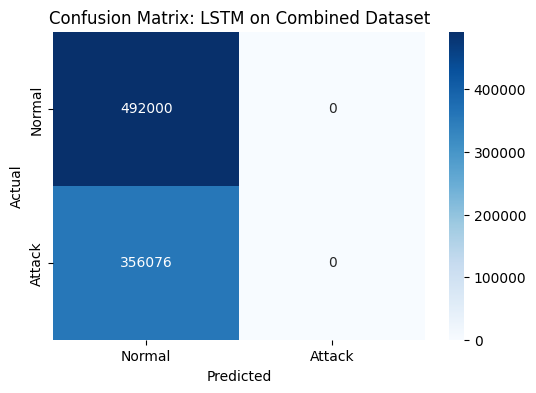

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
print(f"\n✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Classification report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: LSTM on Combined Dataset')
plt.show()


**Rebalance the Combined Dataset**

In [ ]:
from sklearn.utils import resample

df_majority = combined_df[combined_df.label == 0]
df_minority = combined_df[combined_df.label == 1]

df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=42)

balanced_df = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the data
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_df['label'].value_counts())


label
0    356076
1    356076
Name: count, dtype: int64


**Tokenize and Pad the Balanced Data**

In [ ]:
sequences = tokenizer.texts_to_sequences(balanced_df['message'])
X_test = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
y_test = balanced_df['label']


**Predict and Evaluate Again**

22255/22255 ━━━━━━━━━━━━━━━━━━━━ 422s 19ms/step
✅ Accuracy: 0.5

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67    356076
           1       0.00      0.00      0.00    356076

    accuracy                           0.50    712152
   macro avg       0.25      0.50      0.33    712152
weighted avg       0.25      0.50      0.33    712152



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/IPython/c

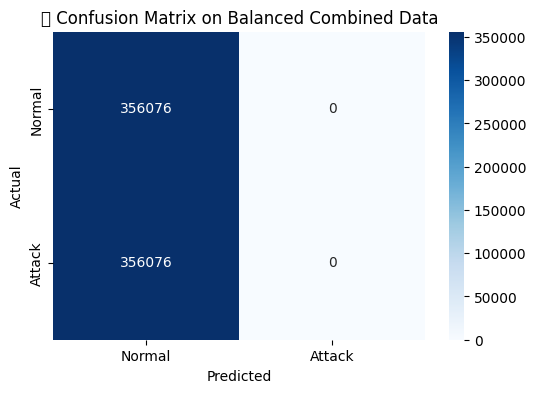

In [ ]:
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.title('🔍 Confusion Matrix on Balanced Combined Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
